![fotos de capas de projetos notebooks.jpg](<attachment:fotos de capas de projetos notebooks.jpg>)
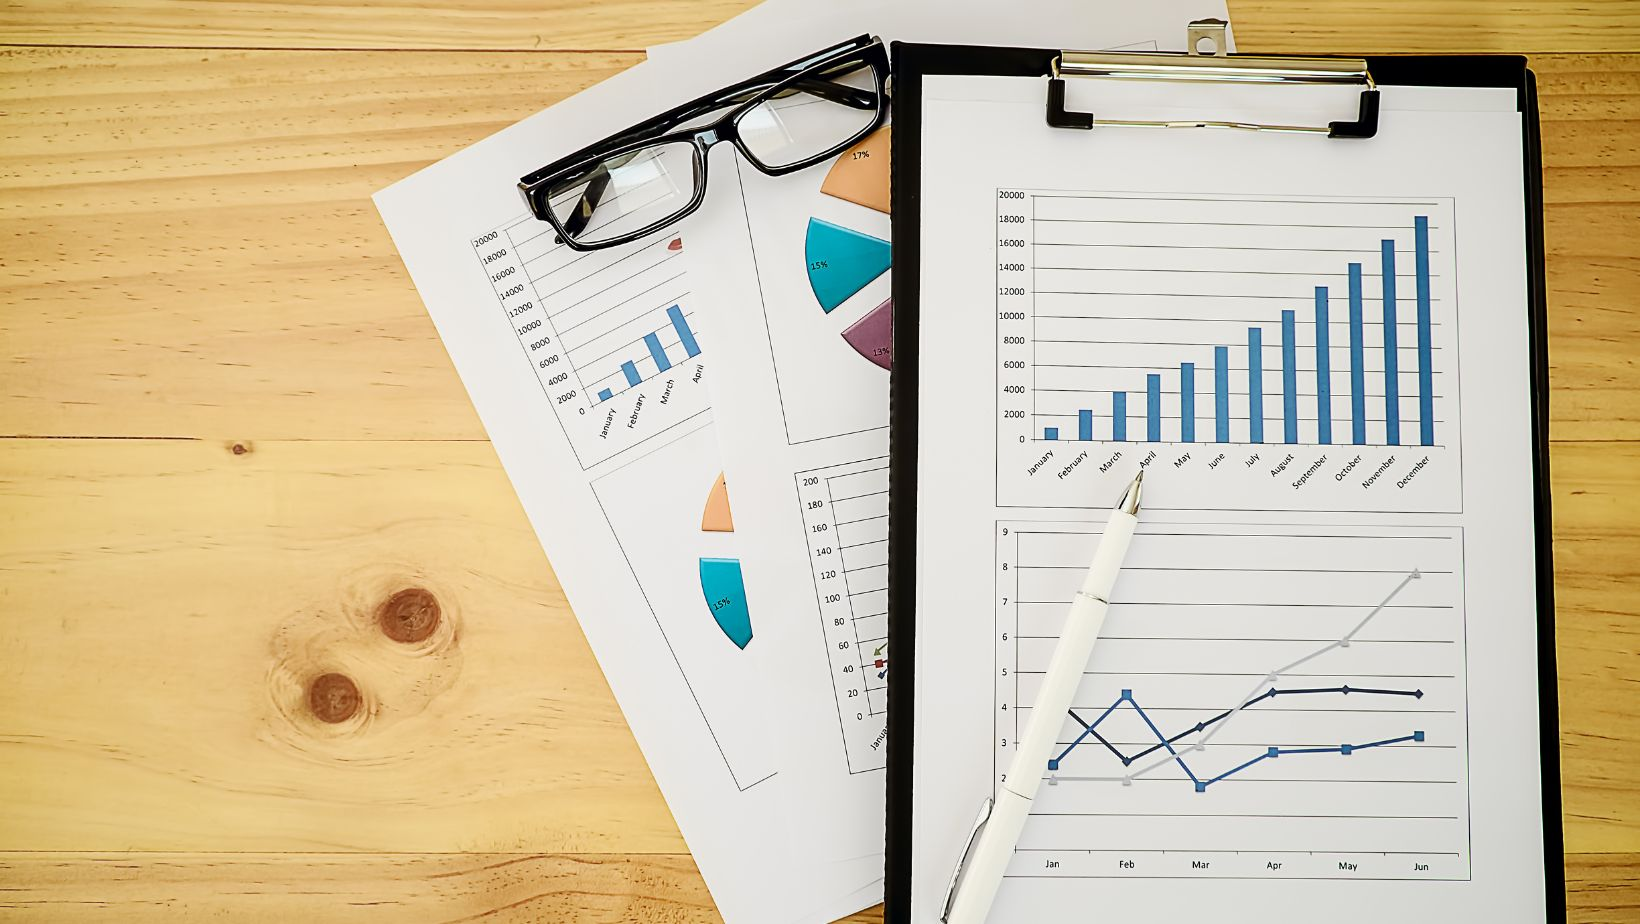

# *Otimização Estratégica: Explorando Hipóteses e A/B Testing para Impulsionar a Receita Online.*

## *Descrição do Project*

*Como analista em uma grande loja online, colaboramos com o departamento de marketing para formular uma lista de hipóteses estratégicas destinadas a impulsionar a receita.*

*Este projeto tem como objetivo priorizar essas hipóteses, conduzir testes A/B utilizando a abordagem Mann-Whitney, e analisar os resultados.*

*Além disso, incorporaremos os frameworks ICE (Impact, Confidence, Effort) e RICE (Reach, Impact, Confidence, Effort) para aprimorar ainda mais a otimização das práticas, visando maximizar o desempenho financeiro da loja.*

## *Descrição dos Dados*

***Conjunto de Dados de Hipóteses***
- *Hypotheses: Breves descrições das hipóteses.*
- *Reach: Alcance do usuário, em uma escala de um a dez.*
- *Impact: Impacto nos usuários, em uma escala de um a dez.*
- *Confidence: Nível de confiança na hipótese, em uma escala de um a dez.*
- *Effort: Recursos necessários para testar a hipótese, em uma escala de um a dez. Maior valor indica maior esforço necessário.*

***Conjunto de Dados de Pedidos***
- *transactionId: Identificador do pedido.*
- *visitorId: Identificador do usuário que fez o pedido.*
- *date: Data do pedido.*
- *revenue: Receita do pedido.*
- *group: Grupo de teste A/B ao qual o usuário pertence.*

***Conjunto de Dados de Visitas***
- *date: Data.*
- *group: Grupo de teste A/B.*
- *visits: Número de visitas na data especificada para o grupo de teste A/B especificado.*

# *Iniciando análises*

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# carregando dados
df_hyp = pd.read_csv('C:/my_workspace/triple_ten/project8/data/hypotheses_us.csv', sep=';')
df_orders = pd.read_csv('C:/my_workspace/triple_ten/project8/data/orders_us.csv')
df_visits = pd.read_csv('C:/my_workspace/triple_ten/project8/data/visits_us.csv')

# *Começando tratamento e limpeza dos dados*

### *df_hyp*

In [3]:
# informações iniciais
df_hyp.info()
df_hyp.head(9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
# transformando colunas para lower case
df_hyp.columns = df_hyp.columns.str.lower()

In [5]:
# nulos ou duplicados?
df_hyp.isna().sum()
df_hyp.duplicated().sum()

0

*Não há duplicados nem valores nulos.*

In [6]:
# valores únicos
df_hyp['hypothesis'].unique()

array(['Add two new channels for attracting traffic. This will bring 30% more users',
       'Launch your own delivery service. This will shorten delivery time',
       "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size",
       'Change the category structure. This will increase conversion since users will find the products they want more quickly',
       'Change the background color on the main page. This will increase user engagement',
       'Add a customer review page. This will increase the number of orders',
       'Show banners with current offers and sales on the main page. This will boost conversion',
       'Add a subscription form to all the main pages. This will help you compile a mailing list',
       'Launch a promotion that gives users discounts on their birthdays'],
      dtype=object)

In [7]:
# algumas métricas iniciais
df_hyp.describe()

,reach,impact,confidence,effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


*Possuímos todos os índices para calcular o ICE & RICE SCORE.*

*Iremos realizar por meio de funções.*

In [8]:
# função ICE
def ice_score(row):
    return (row['impact'] * row['confidence']) / row['effort']

In [9]:
# criando função RICE
def rice_score(row):
    return (row['reach'] * row['impact'] * row['confidence']) / row['effort']

In [10]:
# aplicando...
df_hyp['ice'] = df_hyp.apply(ice_score, axis=1)
df_hyp['rice'] = df_hyp.apply(rice_score, axis=1)

*Definindo prioridades nos frameworks.*

In [11]:
# ice score
df_hyp = df_hyp.sort_values(by='ice', ascending=False)
df_hyp

,hypothesis,reach,impact,confidence,effort,ice,rice
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


***Por ordem de prioridades, o método ICE nos mostra que:***
- *Lance uma promoção que oferece descontos aos usuários em seus aniversários.*
- *Adicione dois novos canais para atrair tráfego. Isso trará 30% mais usuários.*
- *Adicione um formulário de inscrição a todas as páginas principais. Isso ajudará a compilar uma lista de envio.*
- *Mostre banners com ofertas e promoções atuais na página principal. Isso impulsionará a conversão.*
- *Adicione blocos de recomendação de produtos ao site da loja. Isso aumentará a conversão e o tamanho médio das compras.*

In [12]:
# rice score
df_hyp = df_hyp.sort_values(by='rice', ascending=False)
df_hyp

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0



***Por ordem de prioridades, o método RICE nos mostra que:***
- *Adicione um formulário de inscrição a todas as páginas principais. Isso ajudará a compilar uma lista de envio.*
- *Adicione blocos de recomendação de produtos ao site da loja. Isso aumentará a conversão e o tamanho médio das compras.*
- *Adicione dois novos canais para atrair tráfego. Isso trará 30% mais usuários.*
- *Mostre banners com ofertas e promoções atuais na página principal. Isso impulsionará a conversão.*
- *Lance uma promoção que oferece descontos aos usuários em seus aniversários.*

***Podemos concluir então:***
- *que ambos destacam a importância de adicionar um formulário de inscrição e blocos de recomendação de produtos. No entanto, as prioridades diferem.*
- *o método ICE coloca a promoção de aniversário como a principal iniciativa, visando diretamente a fidelização dos clientes. Em contraste, o RICE sugere focar inicialmente na expansão de canais para aumentar o tráfego.*
- *ao que tudo indica, o método ICE está visando resultados mais rápidos para aumentar as conversões agora, enquanto RICE está se concentrando em estabelecer uma base mais robusta de usuários e melhorar a experiência de compra para colher benefícios a longo prazo.*

In [13]:
# resumindo, temos o top five
df_hyp.head()

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


***Overview de df_hyp:***
- *dataframe com apenas 9 linhas*
- *sem nulos ou duplicados*
- *alteramos os nomes das colunas*
- *criamos uma função para calcular ICE SCORE*
- *criamos uma função para calcular o RICE SCORE*
- *aplicamos as funções criadas ao dataframe e com elas novas colunas foram criadas*
- *organizamos por ordens de prioridades os frameworks e tiramos conclusões*

### *df_orders*

In [14]:
# info orders
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [15]:
# shape
df_orders.shape

(1197, 5)

In [16]:
# algumas métricas
df_orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [17]:
# nomes das colunas
df_orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [18]:
# lower case e alterando nomes das colunas
df_orders.columns = df_orders.columns.str.lower()
df_orders.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'}, inplace=True)

In [19]:
# alterando para formato datetime
df_orders.date = pd.to_datetime(df_orders['date'])
df_orders.date.dtypes

dtype('<M8[ns]')

In [20]:
# duplicados ou nulos?
df_orders.isna().sum()
df_orders.duplicated().sum()

0

*Novamente sem duplicados ou nulos.*

In [21]:
# dados da coluna group
df_orders.group.value_counts()

B    640
A    557
Name: group, dtype: int64

*Temos maior participação do grupo B.*

*Vamos verificar se alguns usuários não estão em ambos os grupos A e B simultaneamente.*

In [22]:
# usando nunique
group_count = df_orders.groupby('visitor_id')['group'].nunique()

*Armazenando o índice dos usuários que estãos em ambos os grupos.*

In [23]:
visitors_in_both_groups = group_count[group_count > 1].index.tolist()
len(visitors_in_both_groups)

58

*Temos uma quantidade significante de usuários em ambos os grupos.*

*Iremos remover esses integrantes do grupo B, para emparelhar as amostras.*

In [24]:
df_orders = df_orders[~((df_orders['visitor_id'].isin(visitors_in_both_groups)) & (df_orders['group'] == 'B'))]
df_orders.group.value_counts()

A    557
B    548
Name: group, dtype: int64

*Agora as amostras estão mais pareadas na quantidade de usuários.*

*Vamos olhar a coluna date.*

In [25]:
# coluna date
len(df_orders.date.unique())
df_orders.date.unique()

array(['2019-08-15T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-08-22T00:00:00.000000000',
       '2019-08-17T00:00:00.000000000', '2019-08-23T00:00:00.000000000',
       '2019-08-02T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-24T00:00:00.000000000', '2019-08-03T00:00:00.000000000',
       '2019-08-25T00:00:00.000000000', '2019-08-28T00:00:00.000000000',
       '2019-08-19T00:00:00.000000000', '2019-08-06T00:00:00.000000000',
       '2019-08-26T00:00:00.000000000', '2019-08-29T00:00:00.000000000',
       '2019-08-04T00:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', '2019-08-07T00:00:00.000000000',
       '2019-08-30T00:00:00.000000000', '2019-08-05T00:00:00.000000000',
       '2019-08-27T00:00:00.000000000', '2019-08-21T00:00:00.000000000',
       '2019-08-08T00:00:00.000000000', '2019-08-10T00:00:00.000000000',
       '2019-08-31T00:00:00.000000000', '2019-08-11

*Todos os valores são referentes ao ano de 2019 e o mês de Agosto, variando apenas o dia. Iremos separar em colunas distintas.*

In [26]:
# separando e reordenando
df_orders['year'] = df_orders['date'].dt.year
df_orders['month'] = df_orders['date'].dt.month
df_orders['day'] = df_orders['date'].dt.day

df_orders = df_orders[['transaction_id', 'visitor_id', 'group', 'revenue', 'day', 'month', 'year', 'date']]
df_orders.head()

,transaction_id,visitor_id,group,revenue,day,month,year,date
0,3667963787,3312258926,B,30.4,15,8,2019,2019-08-15
1,2804400009,3642806036,B,15.2,15,8,2019,2019-08-15
2,2961555356,4069496402,A,10.2,15,8,2019,2019-08-15
3,3797467345,1196621759,B,155.1,15,8,2019,2019-08-15
4,2282983706,2322279887,B,40.5,15,8,2019,2019-08-15


In [27]:
# verificando dias
df_orders.day.unique()

array([15, 16,  1, 22, 17, 23,  2, 18, 24,  3, 25, 28, 19,  6, 26, 29,  4,
       20,  9,  7, 30,  5, 27, 21,  8, 10, 31, 11, 12, 13, 14],
      dtype=int64)

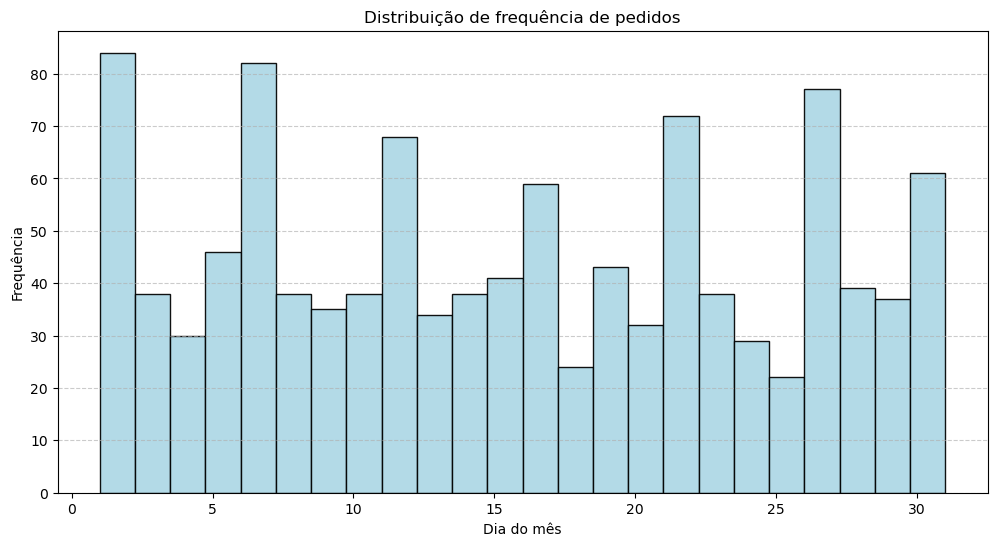

In [28]:
# gerando histograma
plt.figure(figsize=(12, 6))
plt.hist(df_orders['day'], bins=24, color='lightblue', alpha=0.93, edgecolor='black')
plt.title('Distribuição de frequência de pedidos')
plt.xlabel('Dia do mês')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.66)
plt.show()

*Encontramos picos recorrentes. Vamos inserir o dia da semana para análises futuras.*

In [29]:
# nova coluna e reordenando
df_orders['day_of_week'] = df_orders['date'].dt.day_name()
df_orders = df_orders[['transaction_id', 'visitor_id', 'group', 'revenue', 'day_of_week', 'day', 'month', 'year', 'date']]
df_orders.sample(12)

,transaction_id,visitor_id,group,revenue,day_of_week,day,month,year,date
1098,1092419081,3062433592,A,265.3,Monday,12,8,2019,2019-08-12
129,1665445278,1738359350,A,50.2,Thursday,22,8,2019,2019-08-22
51,794298435,2914239125,B,280.5,Friday,16,8,2019,2019-08-16
954,3831307789,3185203440,B,20.8,Wednesday,28,8,2019,2019-08-28
176,1791477067,3261022559,B,20.3,Friday,2,8,2019,2019-08-02
554,3986425716,3908431265,A,15.7,Tuesday,6,8,2019,2019-08-06
831,2851407406,368204224,B,5.9,Friday,30,8,2019,2019-08-30
749,2419950278,509080881,B,300.3,Tuesday,20,8,2019,2019-08-20
869,511011368,1981624632,A,100.2,Thursday,8,8,2019,2019-08-08
49,937773181,3251102545,A,55.7,Friday,16,8,2019,2019-08-16


In [30]:
df_orders.day_of_week.value_counts()

Thursday     194
Friday       184
Monday       170
Saturday     157
Wednesday    153
Tuesday      146
Sunday       101
Name: day_of_week, dtype: int64

*Encontramos o dia da semana em que temos mais pedidos: Quintas e Sextas-feiras. Vamos plotar barras para melhor visualização.*

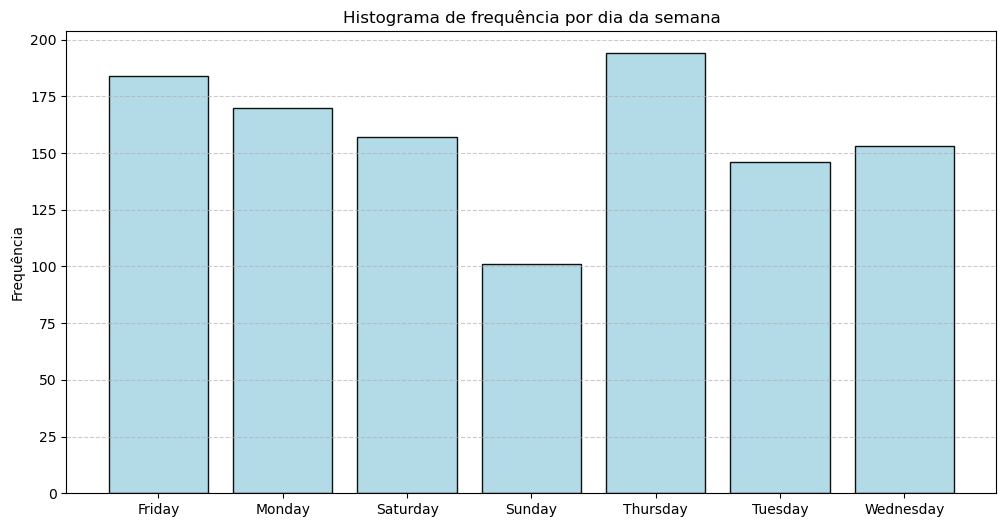

In [31]:
# plt de day_of_week
counts = df_orders['day_of_week'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(counts.index, counts.values, color='lightblue', alpha=0.93, edgecolor='black')
plt.title('Histograma de frequência por dia da semana')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.66)
plt.xticks(range(7))
plt.show()

*Nitidamente o dia com menos pedidos são as Segundas-feiras.*

*Vamos olhar a coluna revenue.*

In [32]:
# métricas
df_orders.revenue.describe()

count     1105.000000
mean       130.503258
std        624.868779
min          5.000000
25%         20.800000
50%         50.100000
75%        125.900000
max      19920.400000
Name: revenue, dtype: float64

*Temos a média com mais do que o dobro da mediana, indicando uma distribuição assimétrica à direita.*

*Vamos verificar os outliers.*

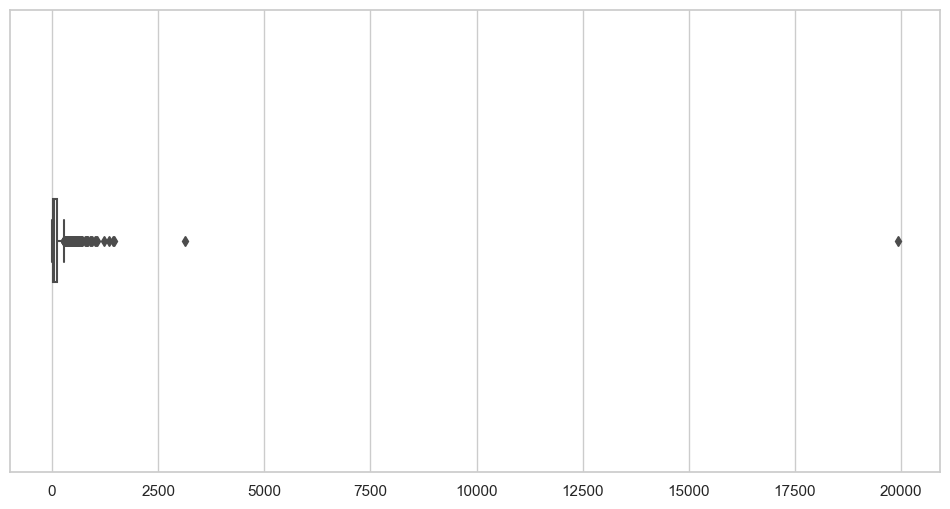

In [33]:
# boxplot 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_orders['revenue'],boxprops=dict(facecolor='white'), width=.18)
plt.xlabel('')
plt.title('')
plt.show()

*Tratamento dos outliers.*

In [34]:
# tratando outliers com Tukey
Q1 = df_orders.revenue.quantile(.25)
Q3 = df_orders.revenue.quantile(.75)

IQR = Q3 - Q1

# definindo limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 *IQR

# removendo
df_orders = df_orders[(df_orders['revenue'] >= lower_limit) & (df_orders['revenue'] <= upper_limit)]

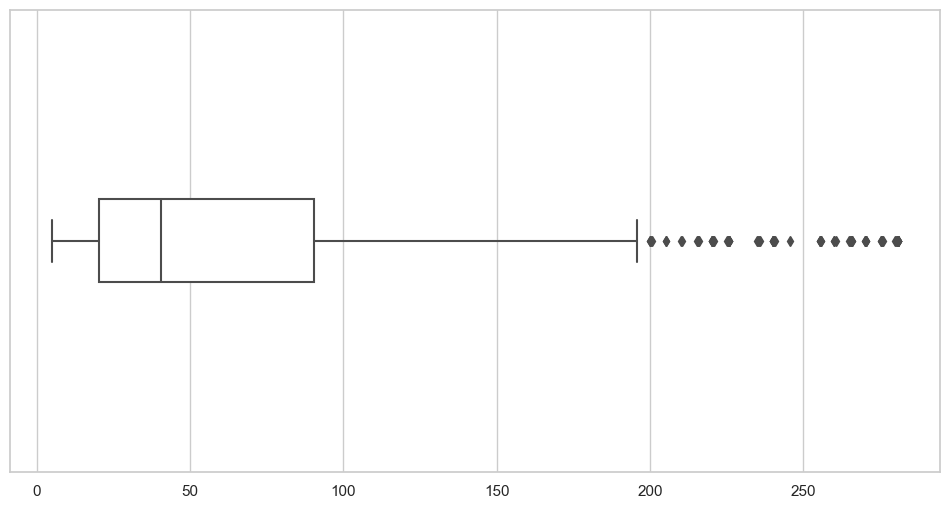

In [35]:
# boxplot de verificação...
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_orders['revenue'],boxprops=dict(facecolor='white'), width=.18)
plt.xlabel('')
plt.title('')
plt.show()

*Outliers removidos.*

*Vamos entender a média e o somatório coluna revenue por grupo.*

In [36]:
# verificando coluna revenue por grupos
grouped = df_orders.groupby(['group'])['revenue'].agg(['sum', 'mean'])
grouped

,sum,mean
group,,
A,34826.1,69.236779
B,33005.1,66.542540


***Overview de df_orders:***
- *temos 5 colunas com 1197 linhas no dataframe df_orders*
- *alteramos os nomes das colunas*
- *alteramos a coluna date para datetime*
- *sem duplicados ou valores nulos*
- *encontramos uma maior participação no grupo B*
- *averiguamos melhor e identificamos usuários pertencendo aos 2 grupos, e regularizamos*
- *criamos histogramas e uma coluna com day_of_week*
- *identificamos que são realizados mais pedidos nas quintas e sextas, e menos nas segundas*
- *percebemos outliers na coluna revenue e os removemos com Tukey*

### *df_visits*

In [37]:
# info visits
df_visits.info()
df_visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [38]:
# len
df_visits.shape

(62, 3)

In [39]:
# métricas dos dados
df_visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [40]:
# alterando para formato datetime
df_visits.date = pd.to_datetime(df_visits['date'])
df_visits.date.dtypes

dtype('<M8[ns]')

In [41]:
# verificando valores
df_visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [42]:
# procurando por nulos e duplicados
df_visits.duplicated().sum()
df_visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

***Overview de df_visits:***
- *sem duplicados e sem valores nulos mais uma vez*
- *3 colunas e apenas 62 linhas*
- *alteramos novamente a coluna date para datetime*
- *na coluna group, temos apenas 2 grupos, A e B*
- *pequena diferença entre média e mediana para a contagem do número de visits*

# ***Iniciando Análises dos Testes A/B***

### *Receita Acumulado por Grupo*

*Criando um novo dataframe e removendo duplicados.*

In [43]:
dates_groups = (df_orders[['date','group']].drop_duplicates()) 

*Agregando orders.*

In [44]:
orders_aggregated = (dates_groups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'transaction_id' : pd.Series.nunique, 
          'visitor_id' : pd.Series.nunique, 
          'revenue' : 'sum'}), 
           axis=1).sort_values(by=['date','group']))

orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,22,18,1460.7
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,2964.2
174,2019-08-02,B,38,37,2469.7
291,2019-08-03,A,65,59,4453.5


*Agregando visits.*

In [45]:
visits_aggregated = (dates_groups.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'visits' : 'sum'}), axis=1).sort_values(by=['date','group']))

visits_aggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
174,2019-08-02,B,1294
291,2019-08-03,A,1845


*Vamos agora combinar as tabelas e atribuir-lhes nomes.*

In [46]:
cumulative_data = (orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group']))
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
cumulative_data.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,22,18,1460.7,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,2964.2,1338
3,2019-08-02,B,38,37,2469.7,1294
4,2019-08-03,A,65,59,4453.5,1845


*Separando por grupos.*

In [47]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

*Vamos plotar, definindo o grupo A com a cor Azul e o grupo B com a cor Verde.*

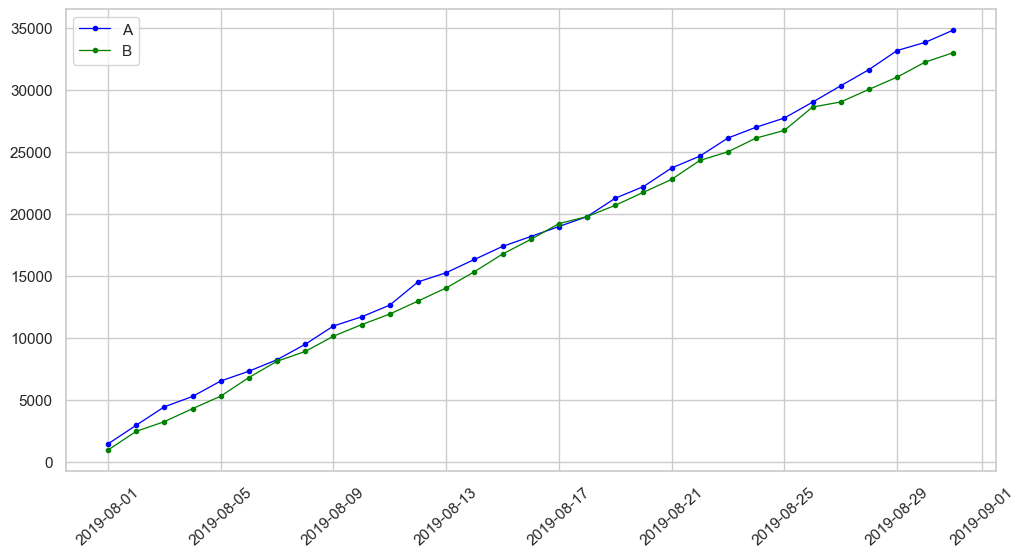

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A', color='blue', marker='.', linewidth=.93)
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B', color='green', marker='.', linewidth=.93)
plt.xticks(rotation=42)
plt.legend() 

*Observamos que ambas os grupos estão aumentando a receita ao longo do tempo.*

*Entre os dias 5 e 9, e entre os dias 25 e 29, observamos uma aproximação do Grupo B (verde). No dia 17, o Grupo B parece superar o Grupo A, sendo este o único momento visualizado neste gráfico.*

### *Tamanho Médio Acumulado do Pedido por Grupo*

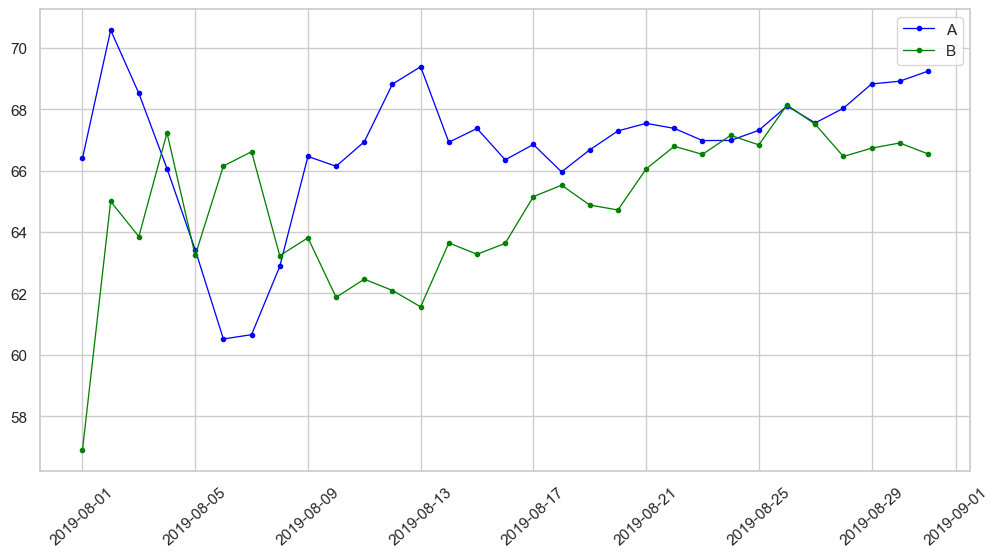

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], 
         cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], 
         label='A', color='blue', marker='.', linewidth=.93)
plt.plot(cumulative_revenue_B['date'], 
         cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], 
         label='B', color='green', marker='.', linewidth=.93)
plt.xticks(rotation=42)
plt.legend()

*O Grupo A é superior na média também aqui, como mostra este gráfico, mas observamos que o Grupo B (verde) supera entre os dias 5 e 10, depois volta a estabilizar e se aproxima novamente do Grupo A perto do dia 25.*

### *Diferença Relativa no Tamanho Médio Acumulado do Pedido do Grupo B em Comparação com o Grupo A*

In [50]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', 
                                                       right_on='date', how='left', suffixes=['A', 'B'])

merged_cumulative_revenue.columns = ['date', 'revenue_A', 'orders_A', 'revenue_B', 'orders_B']

merged_cumulative_revenue.head()

,date,revenue_A,orders_A,revenue_B,orders_B
0,2019-08-01,1460.7,22,967.2,17
1,2019-08-02,2964.2,42,2469.7,38
2,2019-08-03,4453.5,65,3256.2,51
3,2019-08-04,5285.0,80,4302.5,64
4,2019-08-05,6532.3,103,5311.6,84


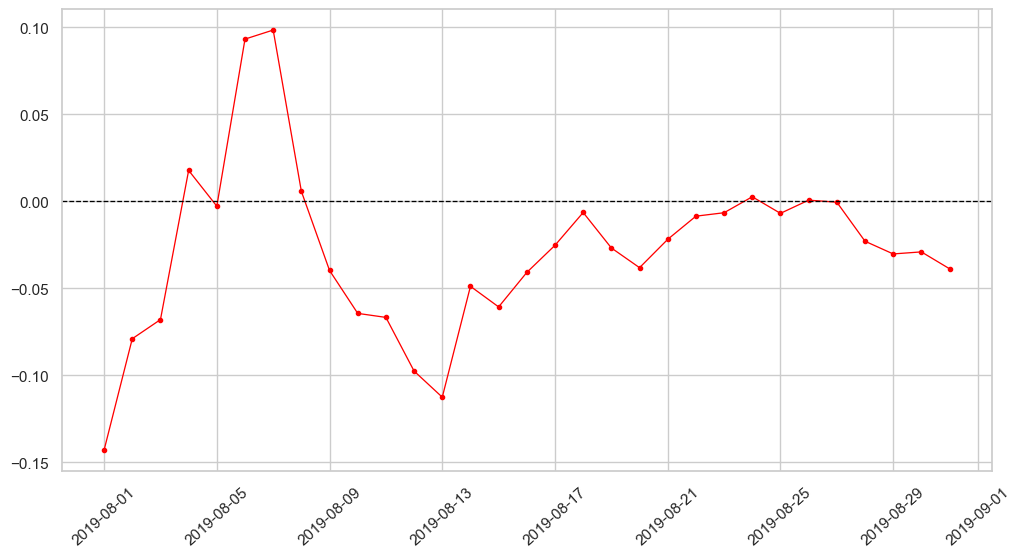

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_B'] / merged_cumulative_revenue['orders_B']) / 
         (merged_cumulative_revenue['revenue_A'] / merged_cumulative_revenue['orders_A']) - 1,
         color='red', marker='.', linewidth=.93)

plt.xticks(rotation=42)
plt.axhline(y=0, color='black', linestyle='--', linewidth=.93)

*Percebemos uma oscilação significativa entre os dias 5 e 17, onde há uma maior diferença nos valores, para depois se estabilizar.*

### *Taxa de Conversão*

In [52]:
# criando coluna conversion
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visits']
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

(18109.0, 18139.0, 0.0, 0.05)

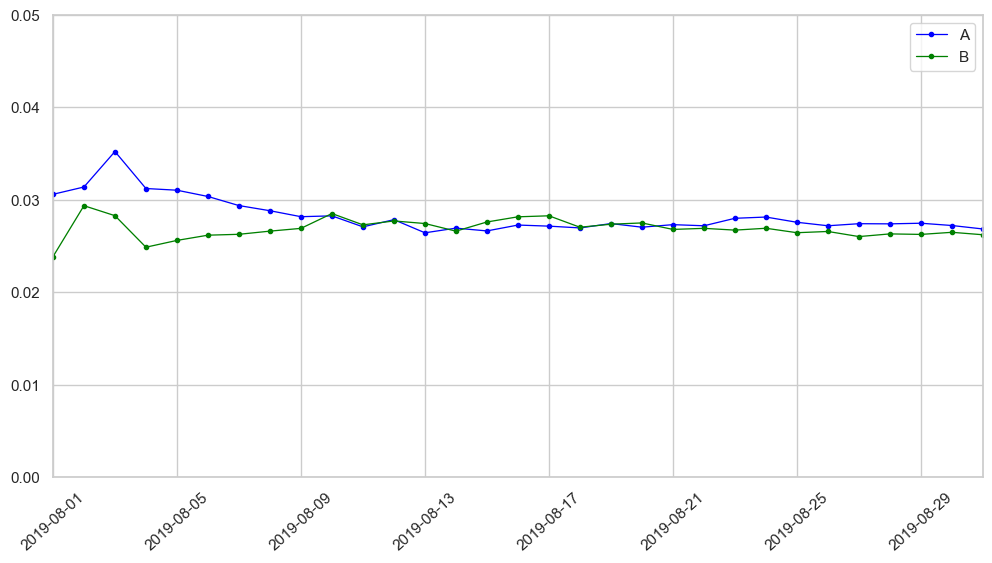

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A', color='blue', marker='.', linewidth=.93)
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B', color='green', marker='.', linewidth=.93)

plt.xticks(rotation=42)
plt.legend()

plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])

### *Taxa de Conversão Diária*

In [54]:
merged_cumulative_conversions = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], 
                                                                               left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

merged_cumulative_conversions.columns = ['date', 'conversion_A', 'conversion_B']
merged_cumulative_conversions.head()

,date,conversion_A,conversion_B
0,2019-08-01,0.030598,0.023843
1,2019-08-02,0.031390,0.029366
2,2019-08-03,0.035230,0.028286
3,2019-08-04,0.031226,0.024874
4,2019-08-05,0.031043,0.025610


(18109.0, 18139.0, -0.5, 0.5)

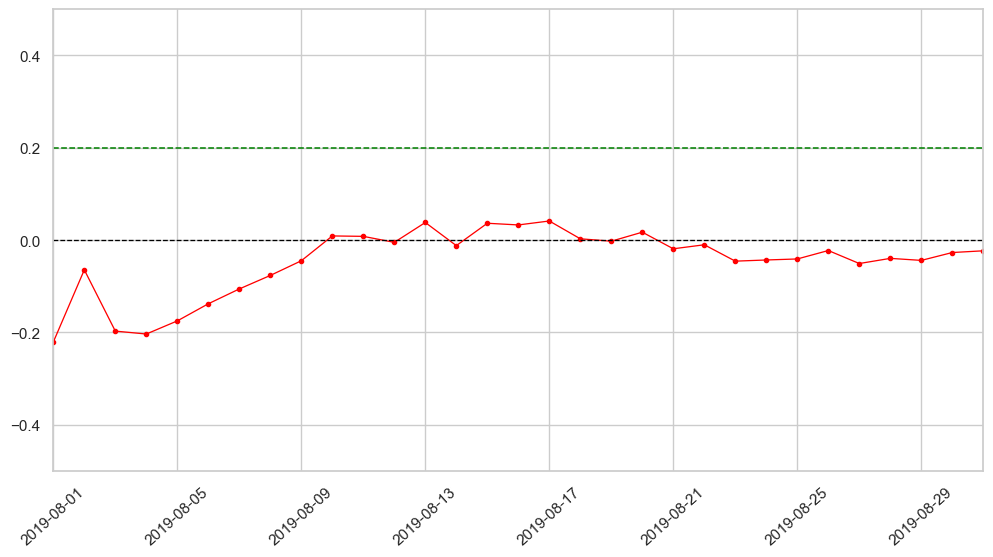

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversion_B'] / merged_cumulative_conversions['conversion_A'] - 1, 
         color='red', marker='.', linewidth=.93)

plt.axhline(y=0, color='black', linestyle='--', linewidth=.93)
plt.axhline(y=0.2, color='green', linestyle='--', linewidth=1.11)

plt.xticks(rotation=42)
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])

*No início do teste, o grupo B estava significativamente atrás, conseguindo uma melhoria significativa após o dia 10 e, posteriormente, caindo ligeiramente após o dia 21. Podemos concluir que, após o dia 10, o grupo B se estabilizou.*

### *Números de Pedidos por Usuário*

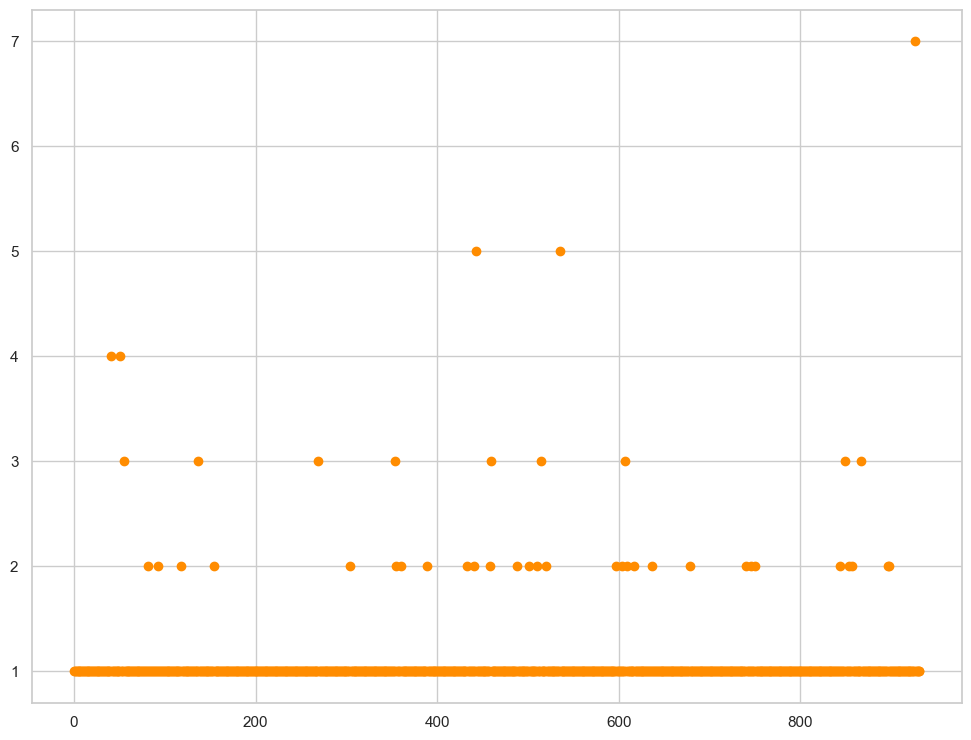

In [56]:
orders_by_users = (df_orders.drop(['group', 'revenue','date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

orders_by_users.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(12, 9))
plt.scatter(x_values, orders_by_users['orders'], color='darkorange')

*Com o gráfico de dispersão gerado, notamos que muito raramente um usuário faz mais de 3 pedidos. Sendo 1 pedido o mais frequente.*

*Vamos calcular os percentiles.*

In [57]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[1. 3.]


*Recebemos a confirmação aqui, onde 95% dos usuários fazem apenas 1 pedido dentro do período mensurado.*

*Podemos considerar também aqui, que acima de 3 pedidos, são uma anomalia.*

### *Preço dos Pedidos*

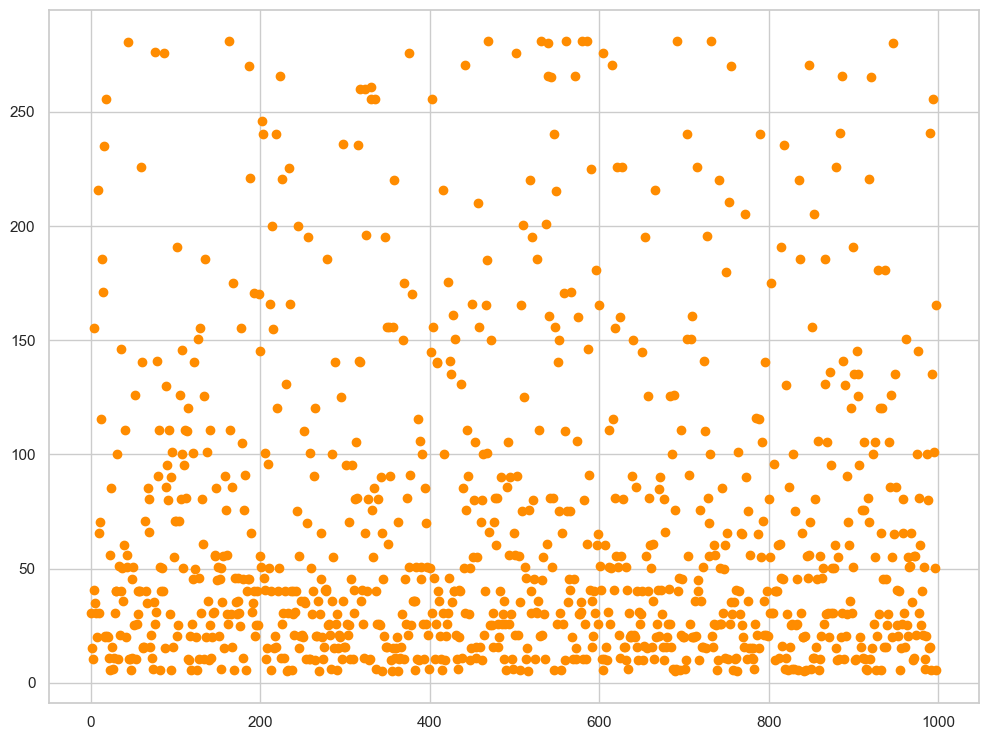

In [58]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.figure(figsize=(12, 9))

plt.scatter(x_values, df_orders['revenue'], color='darkorange')

*Com o gráfico de dispersão bastante uniforme e os valores dispersos de maneira consistente, observamos, no entanto, que pedidos acima de 200-250 se tornam menos frequentes.*

*Vamos calcular os percentiles novamente.*

In [59]:
print(np.percentile(df_orders['revenue'], [95, 99]))

[225.9   280.002]


*A proporção dos custos dos pedidos acima de 225,9 é inferior a 5%, enquanto as taxas acima de 280 são inferiores a 1%. Qualquer valor acima desses limites é considerado uma anomalia.*

### *Significância Estatística*

*Agrupando pedidos por usuário do grupo A.*

In [60]:
orders_by_users_A = df_orders[df_orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_A.columns = ['visitor_id', 'orders']

orders_by_users_A.head()

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


*Agrupando pedidos por usuário do grupo B.*

In [61]:
orders_by_users_B = df_orders[df_orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_B.columns = ['visitor_id', 'orders']

orders_by_users_B.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


*Vamos criar duas amostras para realizar o teste de Mann-Whitney.*

In [62]:
sample_A = (pd.concat([orders_by_users_A['orders'], 
                        pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - 
                                                     len(orders_by_users_A['orders'])), name='orders')], axis=0))

In [63]:
sample_B = (pd.concat([orders_by_users_B['orders'], 
                        pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - 
                                                     len(orders_by_users_B['orders'])), name='orders')], axis=0))

*Aplicando teste de Mann-Whitney com alpha de 5%.*

In [64]:
alpha = 0.05
results_1 = st.mannwhitneyu(sample_A, sample_B)
print('p-value: ', results_1.pvalue.round(3))

if (results_1.pvalue < alpha):
    print("A hipótese nula foi rejeitada: a diferença foi estatisticamente significativa.")
else:
    print("Falha em rejeitar a hipótese nula: não podemos concluir que há diferença estatisticamente significativa.")
    
print('Ganho relativo da conversão para o grupo B: ','{0:.3f}'.format(sample_B.mean() / sample_A.mean() - 1))

p-value:  0.611
Falha em rejeitar a hipótese nula: não podemos concluir que há diferença estatisticamente significativa.
Ganho relativo da conversão para o grupo B:  -0.023


*Com p-value de 0.611. Sem diferença significativa. Ganho relativo para B é negativo: -0.023.*

### *Significância Estatística das Diferenças do Tamanho Médio dos Pedidos a partir dos Dados Brutos*

In [81]:
results_2 = st.mannwhitneyu(df_orders[df_orders['group'] == 'A']['revenue'], 
                            df_orders[df_orders['group'] == 'B']['revenue'])
print('p-value: ', results_2.pvalue.round(3))

if (results_2.pvalue < alpha):
    print("A hipótese nula foi rejeitada: a diferença foi estatisticamente significativa.")
else:
    print("Falha em rejeitar a hipótese nula: não podemos concluir diferença estatisticamente significativa.")
    
print('Ganho relativo no tamanho do pedido para o grupo B: ','{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean() / 
                                                                df_orders[df_orders['group']=='A']['revenue'].mean() - 1))

p-value:  0.93
Falha em rejeitar a hipótese nula: não podemos concluir diferença estatisticamente significativa.
Ganho relativo no tamanho do pedido para o grupo B:  -0.039


*Com um p-value de 0.93, falhamos em rejeitar a hipótese nula, indicando a falta de uma diferença estatisticamente significativa.*

*O ganho relativo no tamanho do pedido para o grupo B é -0.039. Em resumo, não há evidência estatística para concluir uma diferença significativa no ganho relativo do tamanho do pedido entre os grupos A e B nos dados analisados.*

### *Significância Estatística das Diferenças de Conversão a partir dos Dados Filtrados*

In [75]:
users_with_many_orders = (pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 1]['visitor_id'], orders_by_users_B[orders_by_users_B['orders'] > 1]['visitor_id']], axis = 0))

print('Usuários com pedidos superiores a 95%:', len(users_with_many_orders))

Usuários com pedidos superiores a 95%: 43


In [78]:
users_with_expensive_orders = df_orders[df_orders['revenue'] > 414]['visitor_id']

print('Usuários com tamanho de pedido superior a 95%:', len(users_with_expensive_orders))

Usuários com tamanho de pedido superior a 95%: 0


In [68]:
abnormal_users = (pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values())

print('Total de', len(abnormal_users), 'usuários não usuais.')

Total de 43 usuários não usuais.


*Criando amostras para aplicar Mann-Whitney.*

In [69]:
sample_A_filtered = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))]['orders'],
                               pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - 
                                                            len(orders_by_users_A['orders'])), name='orders')], axis=0,)

In [70]:
sample_B_filtered = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - 
                                     len(orders_by_users_B['orders'])), name='orders')], axis=0,)

*Vamos aplicar o teste com alpha de 5%.*

In [79]:
results_3 = st.mannwhitneyu(sample_A_filtered, sample_B_filtered)
print('p-value: ', results_3.pvalue.round(3))

if (results_3.pvalue < alpha):
    print("A hipótese nula foi rejeitada: a diferença foi estatisticamente significativa.")
else:
    print("Falha em rejeitar a hipótese nula: não podemos concluir diferença estatisticamente significativa.")
    
print('Ganho relativo da conversão para o grupo B nos dados filtrados: ','{0:.3f}'.format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

p-value:  0.443
Falha em rejeitar a hipótese nula: não podemos concluir diferença estatisticamente significativa.
Ganho relativo da conversão para o grupo B nos dados filtrados:  0.052


*Conclusão: Sem evidência estatística de diferença no ganho de conversão entre A e B.*

### *Significância Estatística da Diferença no Tamanho Médio do Pedido entre os Grupos Usando os Dados Filtrados*

*Vamos filtrar as ordens por cada grupo.*

In [72]:
filtered_order_A = df_orders[np.logical_and(df_orders['group'] == 'A', 
                                            np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue']

In [73]:
filtered_order_B = df_orders[np.logical_and(df_orders['group'] == 'B', 
                                            np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue']

*Aplicando Mann-Whitney novamente com alpha de 5%.*

In [80]:
results_4 = st.mannwhitneyu(filtered_order_A, filtered_order_B)
print('p-value: ', results_4.pvalue.round(3))

if (results_4.pvalue < alpha):
    print("A hipótese nula foi rejeitada: a diferença foi estatisticamente significativa.")
else:
    print("Falha em rejeitar a hipótese nula: não podemos concluir a diferença.")
    
print('Ganho relativo no tamanho do pedido para o grupo B nos dados filtrados: ','{0:.3f}'.format(filtered_order_B.mean() / filtered_order_A.mean() - 1))

p-value:  0.543
Falha em rejeitar a hipótese nula: não podemos concluir a diferença.
Ganho relativo no tamanho do pedido para o grupo B nos dados filtrados:  -0.061


*Com o teste de Mann-Whitney, obtivemos um p-value de 0.543. Não rejeitamos a hipótese nula; sem diferença. Ganho relativo no pedido para B: -0.061. Conclusão: Sem evidência de diferença significativa nos dados filtrados.*

# *Conclusão Final do Projeto*

*Ao analisarmos detalhadamente os dados referentes aos grupos A e B, podemos destacar algumas conclusões importantes:*

*Primeiramente, não identificamos diferenças significativas no tamanho médio dos pedidos, seja nos dados brutos ou filtrados, conforme demonstrado pelo teste de Mann-Whitney.*

*Além disso, as taxas de conversão entre os grupos não apresentaram divergências estatisticamente significativas.*

*Ao explorar o comportamento dos usuários, notamos uma tendência notável: aproximadamente 95% deles realizam apenas um pedido no período analisado. Consideramos pedidos acima de 3 como uma anomalia relevante nesse contexto.*

*Analisando a receita ao longo do tempo, observamos um aumento constante em ambos os grupos. Embora o grupo B tenha superado o grupo A em alguns momentos, que foram raros.*

*Sugerimos uma análise mais aprofundada para compreender as causas dessas oscilações, considerando estratégias específicas para lidar com anomalias, especialmente aquelas relacionadas a pedidos acima de 3.*